In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer.csv')

In [3]:
from sklearn.cluster import KMeans

In [4]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

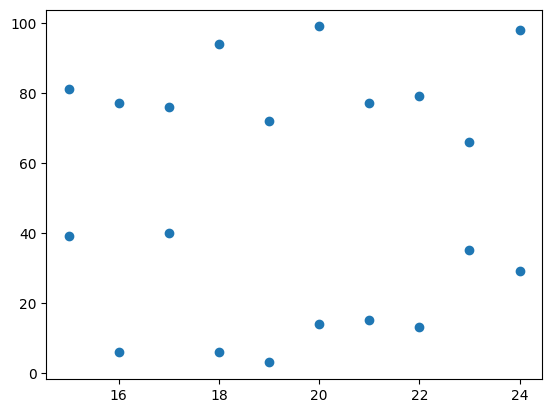

In [5]:
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

In [6]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(x)

    inertia.append(model.inertia_)

In [7]:
inertia

[22321.950000000004,
 3163.9,
 1509.7333333333333,
 526.7142857142858,
 399.8,
 291.8333333333333,
 153.66666666666669,
 112.83333333333334,
 89.33333333333334,
 65.16666666666667]

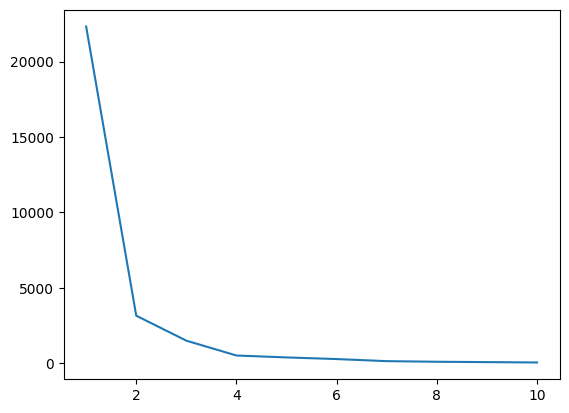

In [8]:
plt.plot(range(1, 11), inertia)

In [9]:
from kneed import KneeLocator

In [10]:
knee = KneeLocator(range(1, 11), inertia, direction='decreasing', curve='convex')

In [11]:
knee.elbow

np.int64(2)

In [12]:
kmeans = KMeans(n_clusters=2, init='k-means++')

In [14]:
y_pred = kmeans.fit_predict(x)

In [15]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
      dtype=int32)

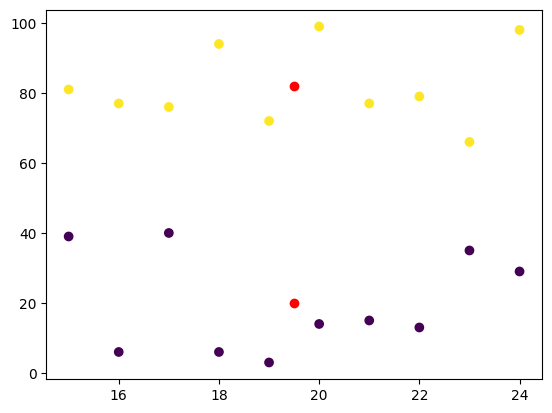

In [21]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=y_pred)